In [1]:
import shutil
import os
import numpy as np

src_path = "/mnt/data1/waris/datasets/data/arctic_dataset/all_data_for_ac_vc"
speakers = ["NJS", "TXHC", "YKWK", "ZHAA"]
out_dir = "/mnt/data1/waris/repo/vc-vq-subset/synthesis_output_IS23_extreme/Original"

final_list = np.load('/mnt/data1/waris/repo/vc-vq-subset/extreme_utterances.npy', allow_pickle='TRUE').item()

for speaker in speakers:

    for utterance in (final_list[speaker]['top'] + final_list[speaker]['bottom']):
        out_fpath = f'{out_dir}/{speaker}'
        os.makedirs(out_fpath, exist_ok=True)
        shutil.copy(f'{src_path}/{speaker}/wav/{utterance}.wav', f'{out_fpath}/{utterance}.wav')

In [2]:
from mcd import Calculate_MCD
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [2]:
# instance of MCD class
# three different modes "plain", "dtw" and "dtw_sl" for the above three MCD metrics
mcd_toolbox = Calculate_MCD(MCD_mode="plain")

# two inputs w.r.t. reference (ground-truth) and synthesized speeches, respectively
mcd_value, _ = mcd_toolbox.calculate_mcd("/mnt/data1/waris/datasets/data_ppg2ppg_v2/BDL/wav/arctic_a0010.wav", "/mnt/data1/waris/repo/vc-vq-subset/synthesis_output/novq/BDL/arctic_a0010.wav")


In [3]:
mcd_value

12.301055735656426

In [3]:
mcd_toolbox = Calculate_MCD(MCD_mode="dtw")
speakers = ['BDL', 'CLB', 'RMS', 'SLT']
variations = ['novq', 'vq1024', 'vq512', 'vq256', 'vq128', 'vq64', 'vq32', 'vq16']
results = []
per_speaker_results = []
utterances = ['arctic_a00'+str(i) for i in range(10,30) if i!=18]
base_recons_fpath = '/mnt/data1/waris/repo/vc-vq-subset/synthesis_output'
original_fpath = '/mnt/data1/waris/datasets/data/arctic_dataset/all_data_for_ac_vc_train'

for variation in variations:
    mcd = 0
    total_frames = 0
    speaker_result_per_variation = []
    for speaker in speakers:
        speaker_mcd = 0
        perspeaker_frames = 0
        for utterance in utterances:
            original_wav = f'{original_fpath}/{speaker}/wav/{utterance}.wav'
            recon_wav = f'{base_recons_fpath}/{variation}/{speaker}/{utterance}.wav'

            mcd_value, frames = mcd_toolbox.calculate_mcd(original_wav, recon_wav)
            mcd = mcd + (mcd_value * frames)
            total_frames = total_frames + frames
            speaker_mcd = speaker_mcd + (mcd_value * frames)
            perspeaker_frames = perspeaker_frames + frames
        speaker_result_per_variation.append(speaker_mcd / perspeaker_frames)
    per_speaker_results.append(speaker_result_per_variation)
    results.append(mcd / total_frames)

print(results)
print(per_speaker_results)

[4.834098059242785, 5.46034025600905, 5.035194698307508, 5.133262494951986]
[[5.1107358710758755, 4.5628240921608825, 5.0210157176551675, 4.671903188516352], [6.02461226785271, 5.245234661367066, 5.361760578844533, 5.230288388925256], [5.46194645723715, 4.746831040915501, 5.163399400074632, 4.795380023239452], [5.5898527160403635, 4.825729370588174, 5.150389307089531, 5.000861619338741]]


In [3]:
mcd_toolbox = Calculate_MCD(MCD_mode="dtw")
speakers = ['BDL', 'CLB', 'RMS', 'SLT']
variations = ['novq', 'vq1024', 'vq512', 'vq256', 'vq128', 'vq64', 'vq32', 'vq16']
results = []
per_speaker_results = []
utterances = ['arctic_a00'+str(i) for i in range(10,30) if i!=18]
base_recons_fpath = '/mnt/data1/waris/repo/vc-vq-subset/synthesis_output'
original_fpath = '/mnt/data1/waris/datasets/data/arctic_dataset/all_data_for_ac_vc_train'

for variation in variations:
    mcd = 0
    total_frames = 0
    speaker_result_per_variation = []
    for speaker in speakers:
        speaker_mcd = 0
        perspeaker_frames = 0
        for utterance in utterances:
            original_wav = f'{original_fpath}/{speaker}/wav/{utterance}.wav'
            recon_wav = f'{base_recons_fpath}/{variation}/{speaker}/{utterance}.wav'

            mcd_value, frames = mcd_toolbox.calculate_mcd(original_wav, recon_wav)
            mcd = mcd + mcd_value
            # total_frames = total_frames + frames
            speaker_mcd = speaker_mcd + mcd_value
            # perspeaker_frames = perspeaker_frames + frames
        speaker_result_per_variation.append(speaker_mcd / 19.0)
    per_speaker_results.append(speaker_result_per_variation)
    results.append(mcd / (19.0 * 4.0))

print(results)
print(per_speaker_results)

[4.796609636933276, 5.183940437337306, 5.249503812746504, 5.107039066477935, 5.017088862901089, 5.431204423454517, 5.805499508892157, 6.153101803398182]
[[5.077844463187083, 4.455933896037658, 4.981907677498622, 4.6707525110097405], [5.636083177110515, 4.853638096176977, 5.2214872251354505, 5.024553250926289], [5.742006260322221, 4.935251926336267, 5.261170168788109, 5.059586895539424], [5.58663924557289, 4.768236948216151, 5.117057806607718, 4.956222265514976], [5.4469417630129335, 4.711128424672654, 5.132389721058432, 4.777895542860331], [6.0422800211052135, 5.162751807204294, 5.334508517735791, 5.185277347772775], [6.558020957754049, 5.523726549026363, 5.598676053927842, 5.541574474860375], [6.848594909821871, 5.981516820175277, 5.691150874527882, 6.091144609067715]]


In [2]:
mcd_toolbox = Calculate_MCD(MCD_mode="dtw")
speakers = ['BDL', 'CLB', 'RMS', 'SLT']
variations = ['novq', 'vq1024', 'vq512', 'vq256', 'vq128', 'vq64', 'vq32', 'vq16']
results = []
per_speaker_results = []
utterances = ['arctic_a00'+str(i) for i in range(10,30) if i!=18]
base_recons_fpath = '/mnt/data1/waris/repo/vc-vq-subset/synthesis_output'
original_fpath = '/mnt/data1/waris/datasets/data/arctic_dataset/all_data_for_ac_vc_train'

for variation in variations:
    # mcd = 0
    # total_frames = 0
    result_per_speaker = []
    for speaker in speakers:
        # speaker_mcd = 0
        # perspeaker_frames = 0
        result_per_utterance = []
        for utterance in utterances:
            original_wav = f'{original_fpath}/{speaker}/wav/{utterance}.wav'
            recon_wav = f'{base_recons_fpath}/{variation}/{speaker}/{utterance}.wav'

            mcd_value, frames = mcd_toolbox.calculate_mcd(original_wav, recon_wav)
            # mcd = mcd + mcd_value
            # total_frames = total_frames + frames
            # speaker_mcd = speaker_mcd + mcd_value
            # perspeaker_frames = perspeaker_frames + frames
            result_per_utterance.append(mcd_value)
        result_per_speaker.append(result_per_utterance)
    # per_speaker_results.append(speaker_result_per_variation)
    results.append(result_per_speaker)

print(results)

[[[5.154530061642457, 6.205905477629009, 5.037400558958191, 4.865025447383678, 4.899119159380572, 5.0235733375725005, 5.2042664231129745, 4.836527349835768, 4.896224047522569, 5.136357735199768, 4.923872554530731, 4.950186723769809, 5.49507124783345, 5.2366627115299265, 4.6035650411877995, 5.186654333856071, 5.62406845309497, 3.7636360321345674, 5.436398104379761], [4.938266796934463, 4.624251228931653, 3.6026255185499383, 4.457365613131784, 4.157403870394281, 4.001133140912657, 3.815603170301358, 4.480059483307914, 4.3365425677598886, 4.428161832180048, 4.475073426561586, 4.638234990207296, 7.004271188456194, 4.031378734632934, 4.279479916843783, 4.084852292744886, 4.7363702890940385, 4.41863724258553, 4.153032721185277], [5.564500570501929, 5.931391270539816, 4.4295432589149355, 5.210577395517717, 4.279138329714975, 4.772971652308179, 4.753283266117637, 4.988412777991169, 5.367993335523015, 5.664250207297079, 4.477889591793049, 4.851267233252976, 5.236128038867859, 4.916416924158235,

In [3]:
results = np.array(results)

In [4]:
variation_means = np.array([np.mean(results[i].flatten()) for i in range(len(results))])
variation_std = np.array([np.std(results[i].flatten()) for i in range(len(results))])

In [5]:
variation_means

array([4.79660964, 5.18394044, 5.24950381, 5.10703907, 5.01708886,
       5.43120442, 5.80549951, 6.1531018 ])

In [6]:
variation_std

array([0.63952974, 0.60128109, 0.6129768 , 0.6333132 , 0.57632949,
       0.63718209, 0.80480177, 0.83975895])

In [7]:
# Define labels, positions, bar heights and error bar heights
x_pos = np.arange(len(variations))
variations = ['No VQ', 'VQ 1024', 'VQ 512', 'VQ 256', 'VQ 128', 'VQ 64', 'VQ 32', 'VQ 16']

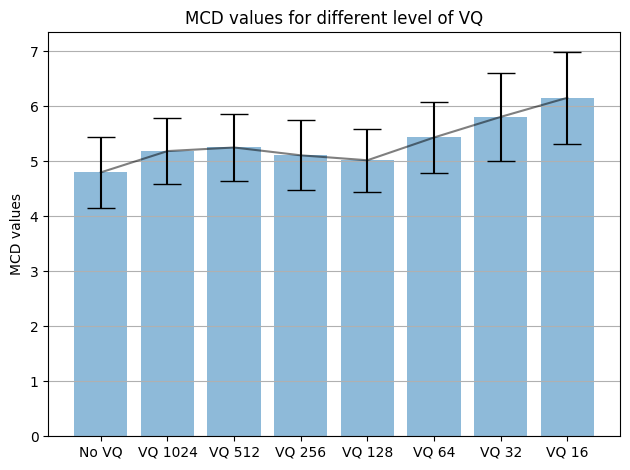

In [16]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, variation_means,
       yerr=variation_std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.plot(x_pos, variation_means, color='black', alpha=0.5)
ax.set_ylabel('MCD values')
ax.set_xticks(x_pos)
ax.set_xticklabels(variations)
ax.set_title('MCD values for different level of VQ')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

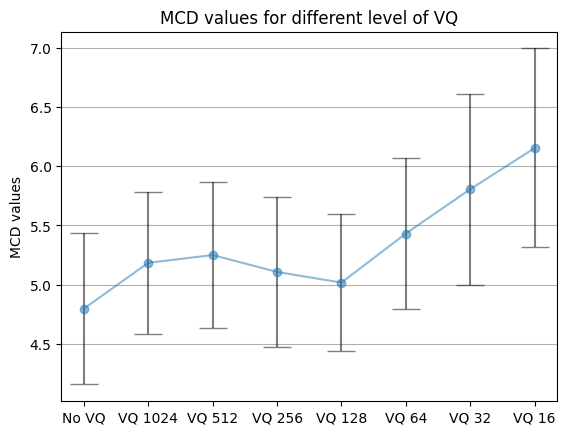

In [13]:
fig, ax = plt.subplots()
ax.errorbar(x_pos, variation_means,
            yerr=variation_std,
            fmt='-o',
            alpha=0.5,
            ecolor='black',
            capsize=10)


ax.set_ylabel('MCD values')
ax.set_xticks(x_pos)
ax.set_xticklabels(variations)
ax.set_title('MCD values for different level of VQ')
ax.yaxis.grid(True)

plt.show()

In [10]:
p_values = np.zeros((len(variations), len(variations)))
for i in range(len(variations)):
    for j in range(i, len(variations)):
        _, p_values[i][j] = f_oneway(results[i].flatten(), results[j].flatten())
        p_values[i][j] = round(p_values[i][j], 4)


In [11]:
p_values

array([[1.000e+00, 2.000e-04, 0.000e+00, 3.300e-03, 2.810e-02, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 5.095e-01, 4.469e-01, 8.480e-02, 1.570e-02,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 1.636e-01, 1.800e-02, 7.710e-02,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.644e-01, 2.100e-03,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e-04,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.900e-03, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.060e-02],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]])